In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(7130.6104)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 48


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 672.45059  validloss 1050.09350±0.00000  bestvalidloss 1050.09350  last_update 0
train: iter 1  trainloss 147.35522  validloss 474.31043±0.00000  bestvalidloss 474.31043  last_update 0
train: iter 2  trainloss -188.89792  validloss 61.32985±0.00000  bestvalidloss 61.32985  last_update 0
train: iter 3  trainloss -447.25883  validloss -159.40684±0.00000  bestvalidloss -159.40684  last_update 0
train: iter 4  trainloss -618.24016  validloss -320.55755±0.00000  bestvalidloss -320.55755  last_update 0
train: iter 5  trainloss -777.81647  validloss -501.28083±0.00000  bestvalidloss -501.28083  last_update 0
train: iter 6  trainloss -875.18149  validloss -542.31085±0.00000  bestvalidloss -542.31085  last_update 0
train: iter 7  trainloss -951.15372  validloss -765.06280±0.00000  bestvalidloss -765.06280  last_update 0
train: iter 8  trainloss -1030.11993  validloss -834.99042±0.00000  bestvalidloss -834.99042  last_update 0
train: iter 9  trainloss 

train: iter 75  trainloss -1796.38094  validloss -1758.39094±0.00000  bestvalidloss -1795.06041  last_update 1
train: iter 76  trainloss -1861.02898  validloss -1815.31055±0.00000  bestvalidloss -1815.31055  last_update 0
train: iter 77  trainloss -1799.18858  validloss -1670.61552±0.00000  bestvalidloss -1815.31055  last_update 1
train: iter 78  trainloss -1860.64181  validloss -1811.90768±0.00000  bestvalidloss -1815.31055  last_update 2
train: iter 79  trainloss -1877.42610  validloss -1809.83046±0.00000  bestvalidloss -1815.31055  last_update 3
train: iter 80  trainloss -1851.09617  validloss -1775.36255±0.00000  bestvalidloss -1815.31055  last_update 4
train: iter 81  trainloss -1817.29247  validloss -1752.87663±0.00000  bestvalidloss -1815.31055  last_update 5
train: iter 82  trainloss -1828.90306  validloss -1591.97860±0.00000  bestvalidloss -1815.31055  last_update 6
train: iter 83  trainloss -1879.75497  validloss -1815.78613±0.00000  bestvalidloss -1815.78613  last_update 0
t

train: iter 149  trainloss -2122.93578  validloss -2072.99366±0.00000  bestvalidloss -2074.52473  last_update 2
train: iter 150  trainloss -2083.94631  validloss -2036.76771±0.00000  bestvalidloss -2074.52473  last_update 3
train: iter 151  trainloss -1955.72265  validloss -1996.43982±0.00000  bestvalidloss -2074.52473  last_update 4
train: iter 152  trainloss -2085.00566  validloss -1990.76064±0.00000  bestvalidloss -2074.52473  last_update 5
train: iter 153  trainloss -2120.98721  validloss -2059.95657±0.00000  bestvalidloss -2074.52473  last_update 6
train: iter 154  trainloss -2089.38387  validloss -2065.09089±0.00000  bestvalidloss -2074.52473  last_update 7
train: iter 155  trainloss -1877.97910  validloss -1882.68853±0.00000  bestvalidloss -2074.52473  last_update 8
train: iter 156  trainloss -2076.95949  validloss -2005.58424±0.00000  bestvalidloss -2074.52473  last_update 9
train: iter 157  trainloss -2072.00869  validloss -1978.39995±0.00000  bestvalidloss -2074.52473  last_u

train: iter 223  trainloss -2119.70095  validloss -1999.65002±0.00000  bestvalidloss -2148.77823  last_update 6
train: iter 224  trainloss -2156.19170  validloss -2089.61617±0.00000  bestvalidloss -2148.77823  last_update 7
train: iter 225  trainloss -1808.34113  validloss -2065.10311±0.00000  bestvalidloss -2148.77823  last_update 8
train: iter 226  trainloss -2113.34507  validloss -1956.22315±0.00000  bestvalidloss -2148.77823  last_update 9
train: iter 227  trainloss -2167.63025  validloss -2091.93611±0.00000  bestvalidloss -2148.77823  last_update 10
train: iter 228  trainloss -2173.75998  validloss -2119.99302±0.00000  bestvalidloss -2148.77823  last_update 11
train: iter 229  trainloss -2188.40907  validloss -2143.11258±0.00000  bestvalidloss -2148.77823  last_update 12
train: iter 230  trainloss -2135.00846  validloss -2143.68273±0.00000  bestvalidloss -2148.77823  last_update 13
train: iter 231  trainloss -2157.53727  validloss -2115.36561±0.00000  bestvalidloss -2148.77823  la

train: iter 296  trainloss -2188.65530  validloss -2134.03969±0.00000  bestvalidloss -2184.94150  last_update 8
train: iter 297  trainloss -2111.05498  validloss -2142.22634±0.00000  bestvalidloss -2184.94150  last_update 9
train: iter 298  trainloss -2159.59117  validloss -2097.09366±0.00000  bestvalidloss -2184.94150  last_update 10
train: iter 299  trainloss -2170.26892  validloss -2074.67956±0.00000  bestvalidloss -2184.94150  last_update 11
train: iter 300  trainloss -2133.91374  validloss -2129.91341±0.00000  bestvalidloss -2184.94150  last_update 12
train: iter 301  trainloss -2120.71937  validloss -2126.45934±0.00000  bestvalidloss -2184.94150  last_update 13
train: iter 302  trainloss -2151.42913  validloss -1931.56708±0.00000  bestvalidloss -2184.94150  last_update 14
train: iter 303  trainloss -2201.44228  validloss -2156.06434±0.00000  bestvalidloss -2184.94150  last_update 15
train: iter 304  trainloss -2211.93545  validloss -2184.60827±0.00000  bestvalidloss -2184.94150  

train: iter 369  trainloss -2203.24139  validloss -2192.12090±0.00000  bestvalidloss -2215.69409  last_update 8
train: iter 370  trainloss -2207.72414  validloss -2174.19763±0.00000  bestvalidloss -2215.69409  last_update 9
train: iter 371  trainloss -2216.26061  validloss -2206.43206±0.00000  bestvalidloss -2215.69409  last_update 10
train: iter 372  trainloss -2153.57332  validloss -2142.27079±0.00000  bestvalidloss -2215.69409  last_update 11
train: iter 373  trainloss -2213.12742  validloss -2189.71168±0.00000  bestvalidloss -2215.69409  last_update 12
train: iter 374  trainloss -2238.01724  validloss -2220.74340±0.00000  bestvalidloss -2220.74340  last_update 0
train: iter 375  trainloss -2238.20798  validloss -2205.21506±0.00000  bestvalidloss -2220.74340  last_update 1
train: iter 376  trainloss -2236.55676  validloss -2204.40042±0.00000  bestvalidloss -2220.74340  last_update 2
train: iter 377  trainloss -2232.45394  validloss -2231.62198±0.00000  bestvalidloss -2231.62198  las

train: iter 442  trainloss -2248.41974  validloss -2201.56756±0.00000  bestvalidloss -2231.62198  last_update 65
train: iter 443  trainloss -2249.79475  validloss -2176.85511±0.00000  bestvalidloss -2231.62198  last_update 66
train: iter 444  trainloss -2230.31098  validloss -2202.77836±0.00000  bestvalidloss -2231.62198  last_update 67
train: iter 445  trainloss -2238.91728  validloss -2149.39258±0.00000  bestvalidloss -2231.62198  last_update 68
train: iter 446  trainloss -2251.02716  validloss -2191.98974±0.00000  bestvalidloss -2231.62198  last_update 69
train: iter 447  trainloss -2226.66287  validloss -2226.43555±0.00000  bestvalidloss -2231.62198  last_update 70
train: iter 448  trainloss -2203.92752  validloss -2125.07932±0.00000  bestvalidloss -2231.62198  last_update 71
train: iter 449  trainloss -2226.56259  validloss -2205.97825±0.00000  bestvalidloss -2231.62198  last_update 72
train: iter 450  trainloss -2235.56807  validloss -2191.71371±0.00000  bestvalidloss -2231.62198

train: iter 515  trainloss -2281.23638  validloss -2240.24272±0.00000  bestvalidloss -2257.54059  last_update 18
train: iter 516  trainloss -2297.67970  validloss -2240.25034±0.00000  bestvalidloss -2257.54059  last_update 19
train: iter 517  trainloss -2291.38134  validloss -2251.54343±0.00000  bestvalidloss -2257.54059  last_update 20
train: iter 518  trainloss -2252.49298  validloss -2215.01525±0.00000  bestvalidloss -2257.54059  last_update 21
train: iter 519  trainloss -2235.43731  validloss -2165.52432±0.00000  bestvalidloss -2257.54059  last_update 22
train: iter 520  trainloss -2275.30138  validloss -2146.39859±0.00000  bestvalidloss -2257.54059  last_update 23
train: iter 521  trainloss -2302.95886  validloss -2211.08368±0.00000  bestvalidloss -2257.54059  last_update 24
train: iter 522  trainloss -2311.91867  validloss -2245.55809±0.00000  bestvalidloss -2257.54059  last_update 25
train: iter 523  trainloss -2297.27505  validloss -2253.86584±0.00000  bestvalidloss -2257.54059

train: iter 588  trainloss -2301.47515  validloss -2230.29402±0.00000  bestvalidloss -2257.79836  last_update 50
train: iter 589  trainloss -2307.12632  validloss -2259.67822±0.00000  bestvalidloss -2259.67822  last_update 0
train: iter 590  trainloss -2304.75414  validloss -2236.82750±0.00000  bestvalidloss -2259.67822  last_update 1
train: iter 591  trainloss -2315.99890  validloss -2237.41646±0.00000  bestvalidloss -2259.67822  last_update 2
train: iter 592  trainloss -2309.92298  validloss -2252.55158±0.00000  bestvalidloss -2259.67822  last_update 3
train: iter 593  trainloss -2302.49732  validloss -2224.11710±0.00000  bestvalidloss -2259.67822  last_update 4
train: iter 594  trainloss -2272.87044  validloss -2209.99670±0.00000  bestvalidloss -2259.67822  last_update 5
train: iter 595  trainloss -2258.37525  validloss -2170.94542±0.00000  bestvalidloss -2259.67822  last_update 6
train: iter 596  trainloss -2285.84112  validloss -2231.13262±0.00000  bestvalidloss -2259.67822  last_

train: iter 661  trainloss -2292.41463  validloss -2233.15089±0.00000  bestvalidloss -2263.29818  last_update 37
train: iter 662  trainloss -2292.77668  validloss -2216.33522±0.00000  bestvalidloss -2263.29818  last_update 38
train: iter 663  trainloss -2297.51449  validloss -2222.36174±0.00000  bestvalidloss -2263.29818  last_update 39
train: iter 664  trainloss -2308.30054  validloss -2253.43223±0.00000  bestvalidloss -2263.29818  last_update 40
train: iter 665  trainloss -2303.11415  validloss -2242.67482±0.00000  bestvalidloss -2263.29818  last_update 41
train: iter 666  trainloss -2307.89516  validloss -2255.64945±0.00000  bestvalidloss -2263.29818  last_update 42
train: iter 667  trainloss -2296.04692  validloss -2258.02076±0.00000  bestvalidloss -2263.29818  last_update 43
train: iter 668  trainloss -2300.99898  validloss -2253.82955±0.00000  bestvalidloss -2263.29818  last_update 44
train: iter 669  trainloss -2305.43027  validloss -2235.95346±0.00000  bestvalidloss -2263.29818

train: iter 734  trainloss -2309.84663  validloss -2246.50851±0.00000  bestvalidloss -2275.56471  last_update 13
train: iter 735  trainloss -2314.47554  validloss -2258.62535±0.00000  bestvalidloss -2275.56471  last_update 14
train: iter 736  trainloss -2309.53346  validloss -2253.80198±0.00000  bestvalidloss -2275.56471  last_update 15
train: iter 737  trainloss -2302.80245  validloss -2252.04634±0.00000  bestvalidloss -2275.56471  last_update 16
train: iter 738  trainloss -2314.91455  validloss -2262.62790±0.00000  bestvalidloss -2275.56471  last_update 17
train: iter 739  trainloss -2316.84715  validloss -2235.52340±0.00000  bestvalidloss -2275.56471  last_update 18
train: iter 740  trainloss -2322.57838  validloss -2258.58354±0.00000  bestvalidloss -2275.56471  last_update 19
train: iter 741  trainloss -2321.93754  validloss -2228.51502±0.00000  bestvalidloss -2275.56471  last_update 20
train: iter 742  trainloss -2316.14052  validloss -2240.82454±0.00000  bestvalidloss -2275.56471

train: iter 808  trainloss -2312.97566  validloss -2266.11080±0.00000  bestvalidloss -2279.88848  last_update 11
train: iter 809  trainloss -2320.49764  validloss -2261.45590±0.00000  bestvalidloss -2279.88848  last_update 12
train: iter 810  trainloss -2316.70315  validloss -2258.08779±0.00000  bestvalidloss -2279.88848  last_update 13
train: iter 811  trainloss -2312.50618  validloss -2193.89586±0.00000  bestvalidloss -2279.88848  last_update 14
train: iter 812  trainloss -2326.78571  validloss -2269.86644±0.00000  bestvalidloss -2279.88848  last_update 15
train: iter 813  trainloss -2290.01069  validloss -2222.80396±0.00000  bestvalidloss -2279.88848  last_update 16
train: iter 814  trainloss -2310.39505  validloss -2210.70969±0.00000  bestvalidloss -2279.88848  last_update 17
train: iter 815  trainloss -2326.44400  validloss -2263.52368±0.00000  bestvalidloss -2279.88848  last_update 18
train: iter 816  trainloss -2306.96939  validloss -2256.04324±0.00000  bestvalidloss -2279.88848

train: iter 881  trainloss -2322.06402  validloss -2253.77129±0.00000  bestvalidloss -2279.88848  last_update 84
train: iter 882  trainloss -2319.03902  validloss -2245.17388±0.00000  bestvalidloss -2279.88848  last_update 85
train: iter 883  trainloss -2319.76195  validloss -2248.92714±0.00000  bestvalidloss -2279.88848  last_update 86
train: iter 884  trainloss -2315.76591  validloss -2258.75654±0.00000  bestvalidloss -2279.88848  last_update 87
train: iter 885  trainloss -2320.61175  validloss -2253.02159±0.00000  bestvalidloss -2279.88848  last_update 88
train: iter 886  trainloss -2308.27278  validloss -2210.74432±0.00000  bestvalidloss -2279.88848  last_update 89
train: iter 887  trainloss -2325.28435  validloss -2255.07899±0.00000  bestvalidloss -2279.88848  last_update 90
train: iter 888  trainloss -2318.65527  validloss -2250.04722±0.00000  bestvalidloss -2279.88848  last_update 91
train: iter 889  trainloss -2325.84661  validloss -2248.13403±0.00000  bestvalidloss -2279.88848

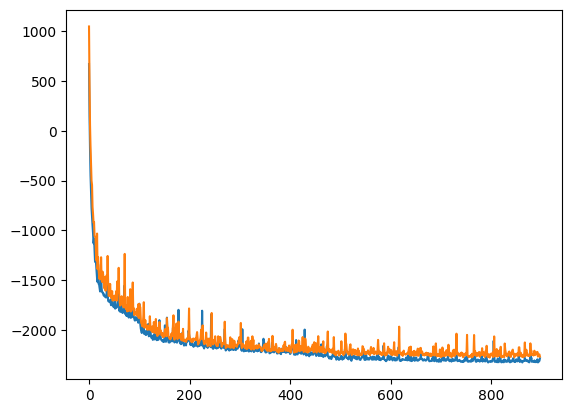

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 5.20550  validloss 5.43600±0.00000  bestvalidloss 5.43600  last_update 0
train: iter 1  trainloss 4.80454  validloss 4.99786±0.00000  bestvalidloss 4.99786  last_update 0
train: iter 2  trainloss 4.47717  validloss 4.61749±0.00000  bestvalidloss 4.61749  last_update 0
train: iter 3  trainloss 4.21239  validloss 4.33713±0.00000  bestvalidloss 4.33713  last_update 0
train: iter 4  trainloss 3.99326  validloss 4.08973±0.00000  bestvalidloss 4.08973  last_update 0
train: iter 5  trainloss 3.78917  validloss 3.88720±0.00000  bestvalidloss 3.88720  last_update 0
train: iter 6  trainloss 3.60528  validloss 3.69840±0.00000  bestvalidloss 3.69840  last_update 0
train: iter 7  trainloss 3.44461  validloss 3.52545±0.00000  bestvalidloss 3.52545  last_update 0
train: iter 8  trainloss 3.29045  validloss 3.35305±0.00000  bestvalidloss 3.35305  last_update 0
train: iter 9  trainloss 3.13861  validloss 3.20937±0.00000  bestvalidloss 3.20937  last_update 0
train: iter 10  trai

train: iter 87  trainloss -1.69872  validloss -1.95623±0.00000  bestvalidloss -1.95982  last_update 1
train: iter 88  trainloss -1.69929  validloss -2.06175±0.00000  bestvalidloss -2.06175  last_update 0
train: iter 89  trainloss -1.71023  validloss -2.03189±0.00000  bestvalidloss -2.06175  last_update 1
train: iter 90  trainloss -1.72901  validloss -2.01664±0.00000  bestvalidloss -2.06175  last_update 2
train: iter 91  trainloss -1.72643  validloss -2.08970±0.00000  bestvalidloss -2.08970  last_update 0
train: iter 92  trainloss -1.75885  validloss -1.98157±0.00000  bestvalidloss -2.08970  last_update 1
train: iter 93  trainloss -1.75066  validloss -2.12486±0.00000  bestvalidloss -2.12486  last_update 0
train: iter 94  trainloss -1.76477  validloss -2.07095±0.00000  bestvalidloss -2.12486  last_update 1
train: iter 95  trainloss -1.76869  validloss -2.11651±0.00000  bestvalidloss -2.12486  last_update 2
train: iter 96  trainloss -1.76648  validloss -2.12361±0.00000  bestvalidloss -2.1

train: iter 180  trainloss -1.82786  validloss -2.24777±0.00000  bestvalidloss -2.30343  last_update 7
train: iter 181  trainloss -1.77056  validloss -2.23525±0.00000  bestvalidloss -2.30343  last_update 8
train: iter 182  trainloss -1.80774  validloss -2.27929±0.00000  bestvalidloss -2.30343  last_update 9
train: iter 183  trainloss -1.76786  validloss -2.19431±0.00000  bestvalidloss -2.30343  last_update 10
train: iter 184  trainloss -1.81860  validloss -2.22563±0.00000  bestvalidloss -2.30343  last_update 11
train: iter 185  trainloss -1.79686  validloss -2.17019±0.00000  bestvalidloss -2.30343  last_update 12
train: iter 186  trainloss -1.78748  validloss -2.22481±0.00000  bestvalidloss -2.30343  last_update 13
train: iter 187  trainloss -1.83421  validloss -2.18591±0.00000  bestvalidloss -2.30343  last_update 14
train: iter 188  trainloss -1.79956  validloss -2.18247±0.00000  bestvalidloss -2.30343  last_update 15
train: iter 189  trainloss -1.77715  validloss -2.23764±0.00000  be

train: iter 270  trainloss -1.78646  validloss -2.30314±0.00000  bestvalidloss -2.32280  last_update 30
train: iter 271  trainloss -1.79946  validloss -2.19381±0.00000  bestvalidloss -2.32280  last_update 31
train: iter 272  trainloss -1.78773  validloss -2.18096±0.00000  bestvalidloss -2.32280  last_update 32
train: iter 273  trainloss -1.80817  validloss -2.18655±0.00000  bestvalidloss -2.32280  last_update 33
train: iter 274  trainloss -1.83863  validloss -2.18295±0.00000  bestvalidloss -2.32280  last_update 34
train: iter 275  trainloss -1.81658  validloss -2.19558±0.00000  bestvalidloss -2.32280  last_update 35
train: iter 276  trainloss -1.81858  validloss -2.24124±0.00000  bestvalidloss -2.32280  last_update 36
train: iter 277  trainloss -1.78536  validloss -2.27958±0.00000  bestvalidloss -2.32280  last_update 37
train: iter 278  trainloss -1.77280  validloss -2.24187±0.00000  bestvalidloss -2.32280  last_update 38
train: iter 279  trainloss -1.82626  validloss -2.18319±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-1.3128, -2.3334, -4.3603, -4.9416], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 124.79229  validloss 131.17855±0.00000  bestvalidloss 131.17855  last_update 0
train: iter 1  trainloss 94.12099  validloss 105.55231±0.00000  bestvalidloss 105.55231  last_update 0
train: iter 2  trainloss 69.88589  validloss 75.59444±0.00000  bestvalidloss 75.59444  last_update 0
train: iter 3  trainloss 55.41998  validloss 58.52966±0.00000  bestvalidloss 58.52966  last_update 0
train: iter 4  trainloss 44.33200  validloss 46.58771±0.00000  bestvalidloss 46.58771  last_update 0
train: iter 5  trainloss 35.61826  validloss 36.94901±0.00000  bestvalidloss 36.94901  last_update 0
train: iter 6  trainloss 28.73119  validloss 29.65998±0.00000  bestvalidloss 29.65998  last_update 0
train: iter 7  trainloss 23.04634  validloss 23.76023±0.00000  bestvalidloss 23.76023  last_update 0
train: iter 8  trainloss 18.43234  validloss 18.83937±0.00000  bestvalidloss 18.83937  last_update 0
train: iter 9  trainloss 14.62110  validloss 15.07819±0.00000  bestvalidloss 15.07819 

train: iter 83  trainloss 0.93512  validloss 1.83065±0.00000  bestvalidloss 1.62150  last_update 28
train: iter 84  trainloss 0.92019  validloss 1.73881±0.00000  bestvalidloss 1.62150  last_update 29
train: iter 85  trainloss 0.92971  validloss 1.70916±0.00000  bestvalidloss 1.62150  last_update 30
train: iter 86  trainloss 0.94701  validloss 1.78423±0.00000  bestvalidloss 1.62150  last_update 31
train: iter 87  trainloss 0.92201  validloss 1.84744±0.00000  bestvalidloss 1.62150  last_update 32
train: iter 88  trainloss 0.95328  validloss 1.62892±0.00000  bestvalidloss 1.62150  last_update 33
train: iter 89  trainloss 0.93950  validloss 1.65073±0.00000  bestvalidloss 1.62150  last_update 34
train: iter 90  trainloss 0.92938  validloss 1.67066±0.00000  bestvalidloss 1.62150  last_update 35
train: iter 91  trainloss 0.94650  validloss 1.67181±0.00000  bestvalidloss 1.62150  last_update 36
train: iter 92  trainloss 0.90541  validloss 1.62355±0.00000  bestvalidloss 1.62150  last_update 37


train: iter 165  trainloss 0.79928  validloss 1.48485±0.00000  bestvalidloss 1.36786  last_update 10
train: iter 166  trainloss 0.82394  validloss 1.50822±0.00000  bestvalidloss 1.36786  last_update 11
train: iter 167  trainloss 0.80641  validloss 1.64102±0.00000  bestvalidloss 1.36786  last_update 12
train: iter 168  trainloss 0.80471  validloss 1.56423±0.00000  bestvalidloss 1.36786  last_update 13
train: iter 169  trainloss 0.79937  validloss 1.35235±0.00000  bestvalidloss 1.35235  last_update 0
train: iter 170  trainloss 0.83145  validloss 1.88128±0.00000  bestvalidloss 1.35235  last_update 1
train: iter 171  trainloss 0.82336  validloss 1.45729±0.00000  bestvalidloss 1.35235  last_update 2
train: iter 172  trainloss 0.81754  validloss 1.52247±0.00000  bestvalidloss 1.35235  last_update 3
train: iter 173  trainloss 0.82139  validloss 1.50836±0.00000  bestvalidloss 1.35235  last_update 4
train: iter 174  trainloss 0.81225  validloss 1.56230±0.00000  bestvalidloss 1.35235  last_updat

train: iter 247  trainloss 0.78055  validloss 1.53534±0.00000  bestvalidloss 1.35235  last_update 78
train: iter 248  trainloss 0.82542  validloss 1.42558±0.00000  bestvalidloss 1.35235  last_update 79
train: iter 249  trainloss 0.82489  validloss 1.53993±0.00000  bestvalidloss 1.35235  last_update 80
train: iter 250  trainloss 0.80035  validloss 1.50875±0.00000  bestvalidloss 1.35235  last_update 81
train: iter 251  trainloss 0.76972  validloss 1.57638±0.00000  bestvalidloss 1.35235  last_update 82
train: iter 252  trainloss 0.79318  validloss 1.48740±0.00000  bestvalidloss 1.35235  last_update 83
train: iter 253  trainloss 0.78783  validloss 1.52722±0.00000  bestvalidloss 1.35235  last_update 84
train: iter 254  trainloss 0.79238  validloss 1.56348±0.00000  bestvalidloss 1.35235  last_update 85
train: iter 255  trainloss 0.79511  validloss 1.74273±0.00000  bestvalidloss 1.35235  last_update 86
train: iter 256  trainloss 0.78472  validloss 1.59455±0.00000  bestvalidloss 1.35235  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-12.9482)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(0.1062)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.0865761186866223
tensor([1.3300])
